In [72]:
from datasets import load_dataset
import pandas as pd
import os
from utils.filemanagement import load_from_file,save_preprocessed_df_to_file
import matplotlib.pyplot as plt


In [73]:
SAMPLE_SIZE = 100
PIPELINE = "basic"
folder_path_data = r"preprocessed_data"
file_name_previous_data ="np_mini_raw.csv"
file_name_data ="np_mini_basic.csv"

df_one = load_from_file(folder_path_data, file_name_previous_data,index_col=0)



In [74]:
df_one['text'] = df_one['text'].str.replace(r'[^\w\s]+', '',regex=True)

In [75]:
save_preprocessed_df_to_file(folder_path_data,file_name_data,df_one)

In [76]:
df = load_from_file(folder_path_data,file_name_data,index_col=0)

In [77]:
df.describe()

,label
count,3600.000000
mean,0.500000
std,0.500069
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [78]:
df.head()

,text,label,date
0,det var spesielt det representanten harald tom...,1,2009-06-03
1,det er selvfølgelig en diskusjon om hvor mange...,1,2011-02-16
2,takk for svaret i den grad det var et svar de ...,0,2007-03-21
3,det er jo riktig at vi må til våre alternative...,0,2004-10-26
4,i dagens dagsavisen sier stortingsrepresentant...,0,2000-11-15


In [79]:
df.text.map(len).max()

16038

In [80]:
df.text.map(len).min()

24

In [81]:
import numpy as np
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

,text,label,date
1317,la meg starte med å minne om den debatten vi h...,0,2015-04-07


In [82]:
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.min())[0]
df.iloc[argmax]

,text,label,date
2936,det er det forslag nr 6,1,2000-12-07


In [83]:
df['date'].unique()

array(['2009-06-03', '2011-02-16', '2007-03-21', ..., '2015-05-07',
       '2007-04-17', '2009-03-23'], dtype=object)

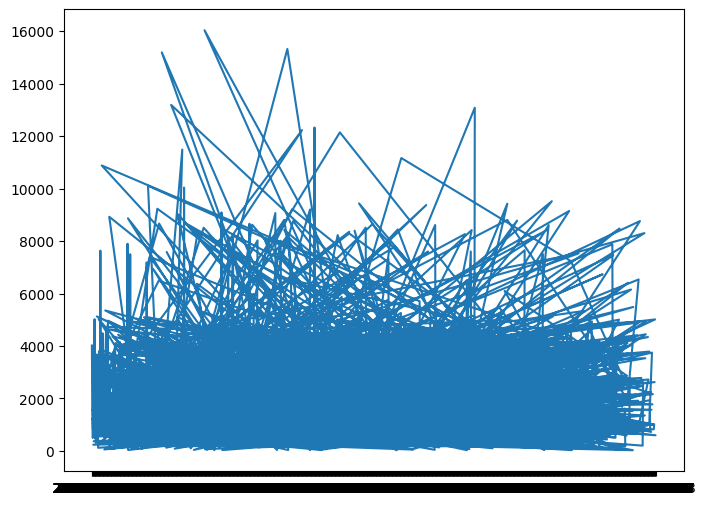

In [84]:
data = df["text"].str.len()

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['date'],data)

df['date'] =pd.to_datetime(df['date'])

In [85]:
df.date

0      2009-06-03
1      2011-02-16
2      2007-03-21
3      2004-10-26
4      2000-11-15
          ...    
3595   2010-06-14
3596   2004-03-10
3597   2009-10-21
3598   2006-10-05
3599   2000-03-29
Name: date, Length: 3600, dtype: datetime64[ns]

In [86]:
partier = {0:'Fremskrittspartiet',1:'Sosialistisk Venstreparti'}
df['partier'] = df['label'].map(partier)

<AxesSubplot: xlabel='partier'>

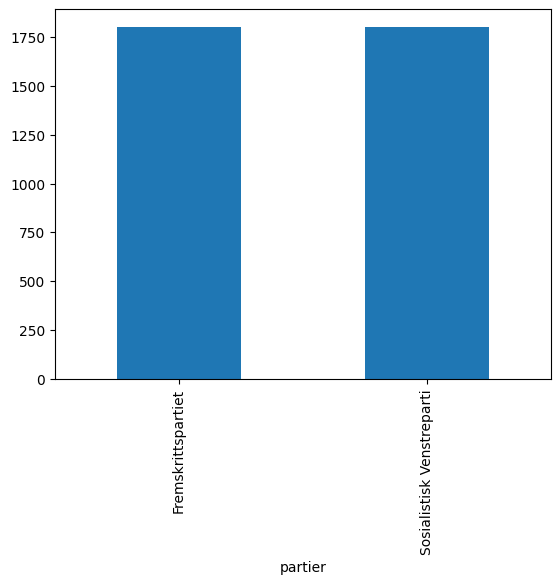

In [87]:
df.groupby('partier')['partier'].count().plot(kind='bar')

Text(0.5, 0, 'Year')

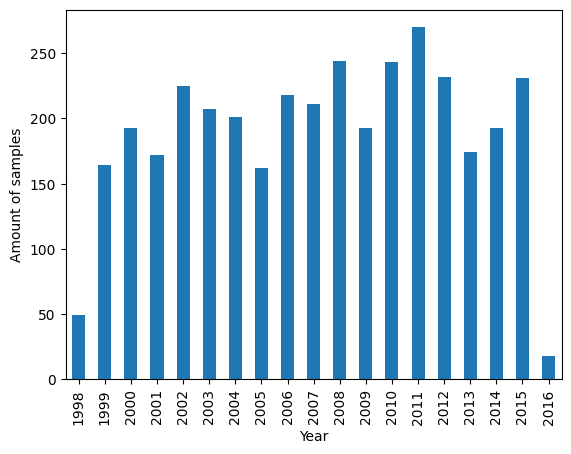

In [88]:
ar = df['text'].groupby(df['date'].dt.to_period('Y')).count().plot(kind='bar')
ar.set_ylabel("Amount of samples")
ar.set_xlabel("Year")

Text(0.5, 0, 'Year')

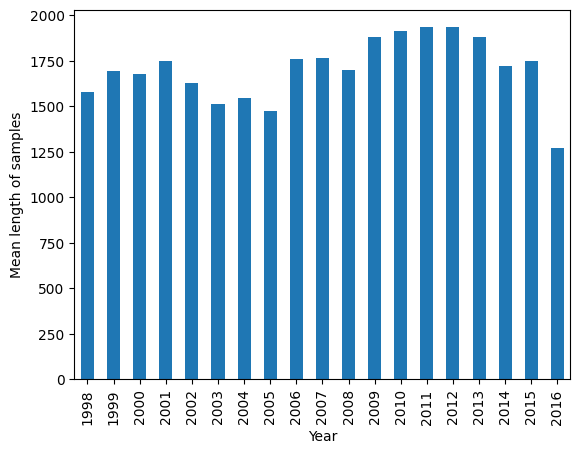

In [89]:
ax = df['text'].str.len().groupby(df['date'].dt.to_period('Y')).mean().plot(kind='bar')
ax.set_ylabel("Mean length of samples")
ax.set_xlabel("Year")

In [90]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [91]:
dd = FreqDist(df['text'])

In [92]:
print(dd)

<FreqDist with 3600 samples and 3600 outcomes>


In [93]:
df['text']

0       det var spesielt det representanten harald tom...
1       det er selvfølgelig en diskusjon om hvor mange...
2       takk for svaret i den grad det var et svar de ...
3       det er jo riktig at vi må til våre alternative...
4       i dagens dagsavisen sier stortingsrepresentant...
                              ...                        
3595    jeg vil slutte meg til det representanten tone...
3596    mitt oppfølgingsspørsmål går til landbruksmini...
3597    jeg tillater meg å stille statsråden følgende ...
3598    de tre fnorganisasjonene som har fått en indik...
3599    jeg takker statsråden for tilleggssvaret det s...
Name: text, Length: 3600, dtype: object

In [94]:
from wordcloud import WordCloud

In [95]:
df['new'] = df['text'].apply(lambda x: word_tokenize(x))

In [96]:
df['label'].value_counts()

1    1800
0    1800
Name: label, dtype: int64

In [97]:
freq = pd.value_counts(np.hstack(df['new']))

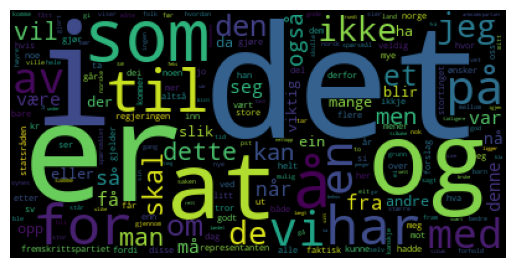

In [98]:
wordcloud = WordCloud().generate_from_frequencies(freq)

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("npnb")
plt.show()


In [99]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(f"Length of vocab: {len(vocab)}")

Length of vocab: 47141


In [100]:
print(f"Max tokens: ${df.text.map(len).max()}")

Max tokens: $16038


In [101]:
print(f"Mix tokens: ${df.text.map(len).min()}")

Mix tokens: $24


In [102]:
r = list(df['text'])

In [103]:
res = 0
for item in r:
    res+= len(item)
print(f"Tokens in dataset: ${res}")

Tokens in dataset: $6265518


In [104]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(f"Length of vocab: {len(vocab)}")
print(f"largest length of entry {df.text.map(len).max()}")
print(f"lowest length of entry {df.text.map(len).min()}")
r = list(df['text'])
res = 0
for item in r:
    res += len(item)
print(f"Tokens in collection {res}")

Length of vocab: 47141
largest length of entry 16038
lowest length of entry 24
Tokens in collection 6265518


In [105]:
from utils.dataset_stats import get_data_stats
from utils.filemanagement import write_dataset_stats

stats = get_data_stats(r)
print(stats)

write_dataset_stats(folder_path_data,file_name_data,stats)

[3600, 47141, 1078981, 22.888377420928702, 299.71694444444444, 197.08416666666668, 2900, 6]
